# Running and evaluating a feature algorithm

In this notebook we run a feaure-based algorithm on a training data set and evaluate performance.

## Setup environment

In [1]:
import numpy as np
from scipy.stats import norm
from thunder import SourceExtraction
from thunder.extraction import OverlapBlockMerger

## Setup plotting

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from thunder import Colorize
image = Colorize.image

## Load data

set the path

In [3]:
path = 's3://neuro.datasets/challenges/neurofinder/02.00/'

load and cache the raw data (we only load first 100 time points because we're on a single node)

In [4]:
data = tsc.loadImages(path + 'images', startIdx=0, stopIdx=100)
data.cache()
data.count();

load the sources

In [5]:
truth = tsc.loadSources(path + 'sources/sources.json')

estimate the mean

In [6]:
im = data.mean()

## Run a feature method

In [7]:
model = SourceExtraction('localmax')
sources = model.fit(data)

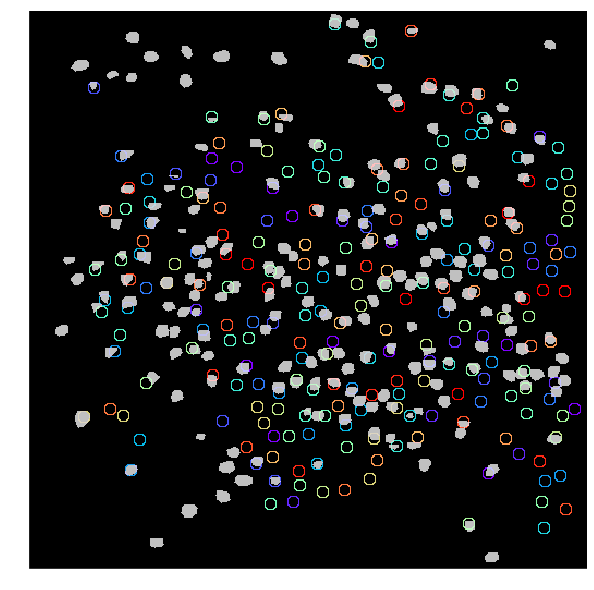

In [8]:
image(sources.masks(im.shape, base=truth, color='random', outline=True), size=10)

estimate score (fraction of matches based on centroid distance)

In [9]:
recall, precision, score = truth.similarity(sources, metric='distance', minDistance=5)

In [10]:
print('recall: %.2f' % recall)
print('precision: %.2f' % precision)
print('score: %.2f' % score)

recall: 0.39
precision: 0.33
score: 0.36


estimate overlap and excess (based on degree of overlap for matching sources)

In [11]:
overlap, exactness = tuple(np.nanmean(truth.overlap(sources, method='rates', minDistance=5), axis=0))

In [12]:
print('overlap: %.2f' % overlap)
print('exactness: %.2f' % exactness)

overlap: 0.55
exactness: 0.64
